In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("all_data.csv")

In [22]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [23]:
print(df.shape)

(96, 4)


In [24]:
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [25]:
df[df.isnull().any(axis=1)]

,Country,Year,Life expectancy at birth (years),GDP


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [27]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


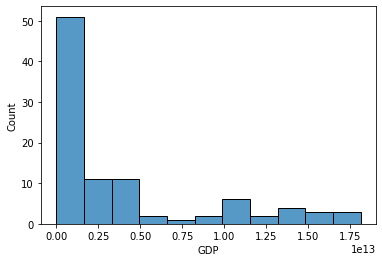

In [28]:
sns.histplot(x='GDP', data=df)
plt.show()
plt.close()

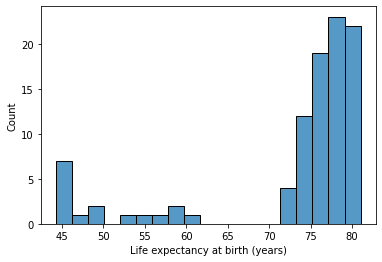

In [29]:
sns.histplot(x='Life expectancy at birth (years)', data=df)
plt.show()
plt.close()

In [30]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [31]:
df = df.rename(columns={"Life expectancy at birth (years)": "Life_Expectancy"})

In [32]:
print(df.head())

  Country  Year  Life_Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


In [33]:
countries_grouped = df.drop("Year", axis = 1).groupby('Country').mean().reset_index()

In [34]:
print(countries_grouped)

                    Country  Life_Expectancy           GDP
0                     Chile         78.94375  1.697888e+11
1                     China         74.26250  4.957714e+12
2                   Germany         79.65625  3.094776e+12
3                    Mexico         75.71875  9.766506e+11
4  United States of America         78.06250  1.407500e+13
5                  Zimbabwe         50.09375  9.062580e+09


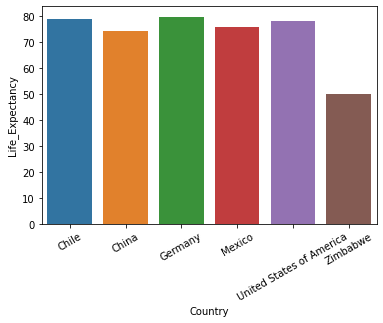

<Figure size 432x288 with 0 Axes>

In [38]:
sns.barplot(x='Country', y="Life_Expectancy", data=countries_grouped)
plt.xticks(rotation=30)
plt.show()
plt.clf()

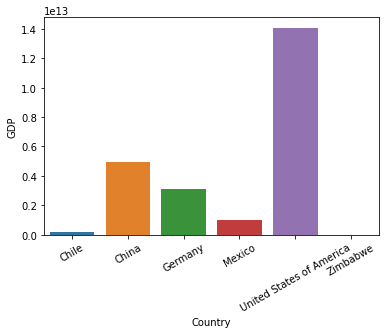

<Figure size 432x288 with 0 Axes>

In [36]:
sns.barplot(x='Country', y="GDP", data=countries_grouped)
plt.xticks(rotation=30)
plt.show()
plt.clf()

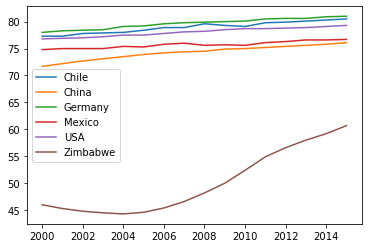

<Figure size 432x288 with 0 Axes>

In [51]:
#This was the first way I solved this problem, graphing each line individually. I knew there had to be a faster way!

plt.plot(df.Year[df.Country == "Chile"], df.Life_Expectancy[df.Country == "Chile"])
plt.plot(df.Year[df.Country == "China"], df.Life_Expectancy[df.Country == "China"])
plt.plot(df.Year[df.Country == "Germany"], df.Life_Expectancy[df.Country == "Germany"])
plt.plot(df.Year[df.Country == "Mexico"], df.Life_Expectancy[df.Country == "Mexico"])
plt.plot(df.Year[df.Country == "United States of America"], df.Life_Expectancy[df.Country == "United States of America"])
plt.plot(df.Year[df.Country == "Zimbabwe"], df.Life_Expectancy[df.Country == "Zimbabwe"])
plt.legend(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"])
plt.show()
plt.clf()

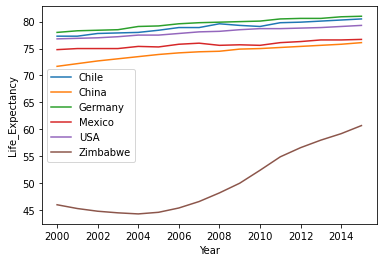

<Figure size 432x288 with 0 Axes>

In [52]:
#And of course there was. Same plot as above, with seaborn. 
sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
plt.legend(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"])
plt.show()
plt.clf()

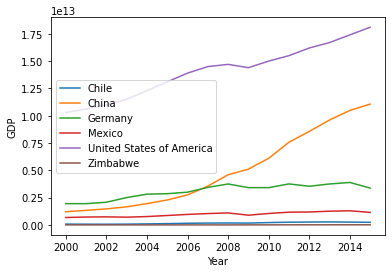

<Figure size 432x288 with 0 Axes>

In [45]:
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country, data=df)
plt.legend()
plt.show()
plt.clf()
plt.savefig("GDP_by_Year.png")

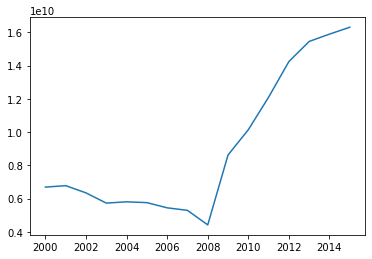

<Figure size 432x288 with 0 Axes>

In [18]:
#I decided to graph Zimbabwe GDP over time individually because I sensed that there might be important trends that were getting
#flattened by the large scale of the rest of the data, and indeed there were.
plt.plot(df.Year[df.Country == "Zimbabwe"], df.GDP[df.Country == "Zimbabwe"])
plt.show()
plt.clf()

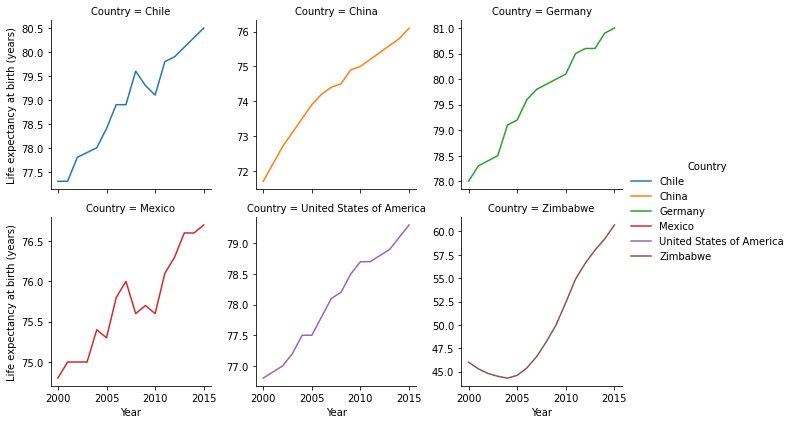

In [46]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)
graph = (graph.map(sns.lineplot,"Year", "Life_Expectancy").add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))
plt.savefig('le_by_year.png')

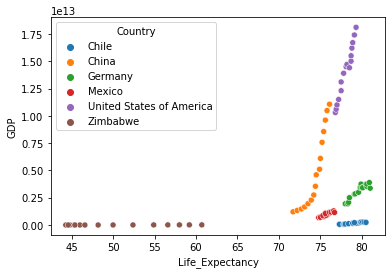

<Figure size 432x288 with 0 Axes>

In [47]:
sns.scatterplot(x=df.Life_Expectancy, y=df.GDP, hue=df.Country)
plt.show()
plt.clf()

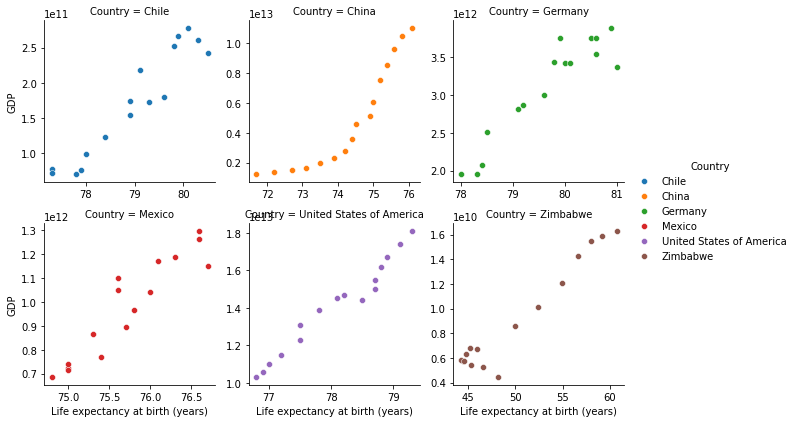

In [48]:
graph2 = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False, sharex = False) 
graph2 = (graph2.map(sns.scatterplot,"Life_Expectancy", "GDP").add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP"))
plt.savefig("GDP_vs_LE.png")

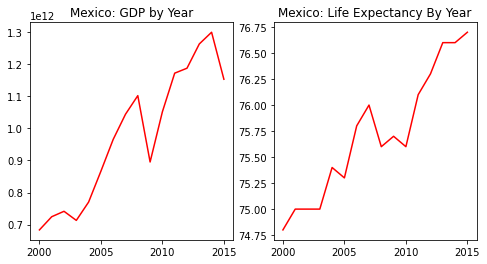

In [50]:
plt.figure(figsize=(8, 4)) 
plt.subplot(1, 2, 1)
plt.plot(df.Year[df.Country == "Mexico"], df.GDP[df.Country == "Mexico"], color='red')
plt.title("Mexico: GDP by Year")
plt.subplot(1, 2, 2)
plt.plot(df.Year[df.Country == "Mexico"], df.Life_Expectancy[df.Country == "Mexico"], color='red')
plt.title("Mexico: Life Expectancy By Year")
plt.show()